<img src="../../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Dimensionality Reduction SWDB 2019 </h1> 
<h3 align="center">Tuesday, August 27, 2019</h3> 

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
from sklearn.decomposition import PCA

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>In this tutorial we look at Unsupervised Learning.  In contrast to supervised learning, unsupervised learning operates on a set of data points $\vec{x}_i$.  Instead of trying to construct a function that maps that data onto another set of given points, we seek to find a transformation that discovers structure in the data.  
</p>
<p>
A simple and important form of unsupervised learning is called Principal Components Analysis, or PCA.  Assume the data $\vec{x}_i$ exists in $N$ dimensions.  Given an integer $n < N$, PCA attemps to find a linear subspace of dimension $n$ that minimizes the variance of the data outside of that subspace.  Put another way, PCA defines a subspace of dimension $n < N$ such that, when the data is approximated by projecting onto that subspace, the reconstruction error is minimized.  
</p>
<p>
Let us denote the subspace with the orthogonal matrix ${\bf W}$, of dimensions $(n, N)$.  The data can be represented with the matrix ${\bf X}$, of dimensions $(T, N)$, where $T$ is the number of samples.  Let the coordinates of the data in the subspace be labelled ${\bf Z}$, which is of dimensions $(T, n)$.  The cost function for PCA is then
</p>
<p>
$E = \frac{1}{2}  \left | {\bf X} - {\bf Z} \cdot {\bf W} \right |^2$
</p>
<p>
Note that we have to optimize over *both* ${\bf Z}$ and ${\bf W}$, subject to the constraint that ${\bf W}$ is orthogonal.
</p>
<p>
We can equivalently define PCA by specifying the principal components as the eigenvectors of the covariance matrix with the $n$ largest eigenvalues.  Intuitively one can see that this choice will produce the smallest amount of variability away from the subspace, and thus solve the problem as we originally defined it.  This allows us to compute the PCAs very simply with diagonalization or SVD.
</p>
<p>
    There are many other unsupervised learning methods.  They are helpful when trying to either reduce the complexity of the dataset in order to facilitate another computation (such as regression or classification) or for exploratory data analysis in which one is trying to discover structure that may be obscured by noise.
 </p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
As before, we will use `sckit-learn` to perform `Principal Components Analysis`, first on some toy data, and then on some data from the Behavior recordings.  The interface will be the same for other algorithms in `scikit-learn`.
</p>
</div>

Let's start with some toy data

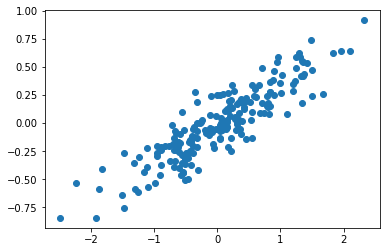

In [3]:
# generate some random 2 dimensional data
# Note that this dataset has a mean of 0 in both dimensions. This will be important later. 

np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T

#plot random data
plt.plot(X[:, 0], X[:, 1], 'o')


In [4]:
X.shape

(200, 2)

In [5]:
# Construct Covariance Matrix
A = (1.0/X.shape[0])*np.dot(X.T, X)

In [6]:
A

array([[0.67988975, 0.22964332],
       [0.22964332, 0.09835428]])

In [7]:
# Compute Eigenvalue decomposition of covariance matrix
evalues, evectors = np.linalg.eig(A)

In [8]:
evalues

array([0.75963778, 0.01860626])

In [9]:
evectors

array([[ 0.94465994, -0.3280512 ],
       [ 0.3280512 ,  0.94465994]])

(-3, 3)

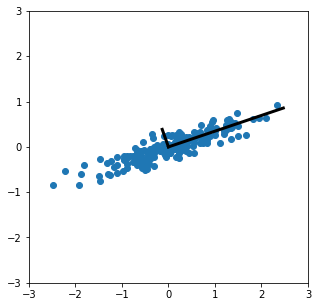

In [10]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(X[:, 0], X[:, 1], 'o')
for a,v in zip(evalues, evectors.T):
    ax.plot([0, 3.*np.sqrt(a)*v[0]], [0, 3.*np.sqrt(a)*v[1]], '-k', lw=3)

ax.set_ylim(-3,3)
ax.set_xlim(-3,3)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
PCA is an orthogonal coordinate system transformation that prioritizes maximum variance.

Project the values onto the first principal component

In [11]:
X_proj_1 = np.dot(X, evectors.T[0])
X_proj_2 = np.dot(X, evectors.T[1])

Text(0, 0.5, 'Second principal component')

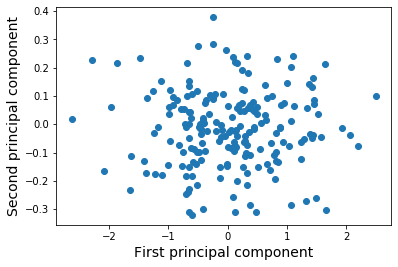

In [12]:
plt.plot(X_proj_1, X_proj_2, 'o')
plt.xlabel("First principal component", fontsize=14)
plt.ylabel("Second principal component", fontsize=14)
# plt.axis('equal')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

### Now let's use sklearn.

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [16]:
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

In [17]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

These components are the same as the eigenvectors we computed above:

In [18]:
evectors

array([[ 0.94465994, -0.3280512 ],
       [ 0.3280512 ,  0.94465994]])

(-3, 3)

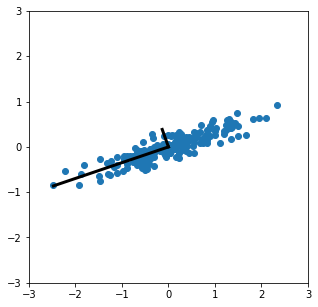

In [19]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(X[:, 0], X[:, 1], 'o')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax.plot([0, v[0]], [0, v[1]], '-k', lw=3)

ax.set_ylim(-3,3)
ax.set_xlim(-3,3)

### Now let's look at the data projected onto the transforms

In [20]:
X_project = pca.fit_transform(X)

In [21]:
X_project = pca.transform(X)

Text(0, 0.5, 'Second principal component')

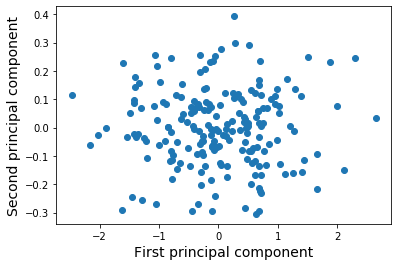

In [22]:
plt.plot(X_project[:,0], X_project[:,1], 'o')
plt.xlabel("First principal component", fontsize=14)
plt.ylabel("Second principal component", fontsize=14)
# plt.axis('equal')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

## Let's try this with some real data from the Visual Behavior dataset.

In [23]:
#make sure your drive path is correct! 
# macOS/OS X
# drive_path = '/Volumes/Brain2018/visual_behavior/'

# Windows (a good guess)
# drive_path = 'e:/visual_behavior'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2018/visual_behavior'

# AWS
drive_path = r'/'

In [24]:
manifest_file = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/SWDB_2019/visual_behavior_data_manifest.csv'
manifest=pd.read_csv(manifest_file, index_col=0)
manifest = manifest.reset_index(drop=True)

In [25]:
manifest.head()

,ophys_experiment_id,container_id,full_genotype,imaging_depth,targeted_structure,stage_name,animal_name,sex,date_of_acquisition,retake_number
0,792815735,791352433,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,175,VISp,OPHYS_1_images_A,744911447,F,2018-12-10 21:19:50,0.0
1,798404219,791352433,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,175,VISp,OPHYS_2_images_A_passive,744911447,F,2018-12-18 23:26:29,1.0
2,795073741,791352433,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,175,VISp,OPHYS_3_images_A,744911447,F,2018-12-13 21:11:17,0.0
3,795953296,791352433,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,175,VISp,OPHYS_4_images_B,744911447,F,2018-12-14 20:17:05,0.0
4,796108483,791352433,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,175,VISp,OPHYS_5_images_B_passive,744911447,F,2018-12-15 20:56:37,0.0


In [26]:
from allensdk.brain_observatory.behavior.swdb import behavior_project_cache as bpc

cache_json = {'manifest_path': '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/SWDB_2019/visual_behavior_data_manifest.csv',
              'nwb_base_dir': '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/SWDB_2019/nwb_files',
              'analysis_files_base_dir': '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/SWDB_2019/extra_files_final'
              }
cache = bpc.BehaviorProjectCache(cache_json)

In [27]:
experiment_id = 822024770
session = cache.get_session(experiment_id)

In [28]:
help(session)

Help on ExtendedBehaviorSession in module allensdk.brain_observatory.behavior.swdb.behavior_project_cache object:

class ExtendedBehaviorSession(allensdk.brain_observatory.behavior.behavior_ophys_session.BehaviorOphysSession)
 |  Represents data from a single Visual Behavior Ophys imaging session.  LazyProperty attributes access the data only on the first demand, and then memoize the result for reuse.
 |  
 |  Attributes:
 |      ophys_experiment_id : int (LazyProperty)
 |          Unique identifier for this experimental session
 |      max_projection : allensdk.brain_observatory.behavior.image_api.Image (LazyProperty)
 |          2D max projection image
 |      stimulus_timestamps : numpy.ndarray (LazyProperty)
 |          Timestamps associated the stimulus presentations on the monitor 
 |      ophys_timestamps : numpy.ndarray (LazyProperty)
 |          Timestamps associated with frames captured by the microscope
 |      metadata : dict (LazyProperty)
 |          A dictionary of sessi

In [29]:
# Load the Trial Response Dataframe
#slow on wifi
tr = session.trial_response_df

In [30]:
# This dataframe is Cell x Trials 
print(np.shape(tr))
tr.dtypes

(126360, 27)


change_image_name        object
cell_roi_id             float64
dff_trace                object
dff_trace_timestamps     object
mean_response           float64
baseline_response       float64
initial_image_name       object
change_time             float64
lick_times               object
response_latency        float64
reward_time             float64
go                         bool
catch                      bool
hit                        bool
miss                       bool
false_alarm                bool
correct_reject             bool
aborted                    bool
auto_rewarded              bool
reward_volume           float64
start_time              float64
stop_time               float64
trial_length            float64
reward_rate             float64
response_binary           int64
p_value                 float64
pref_stim                  bool
dtype: object

In [31]:
tr.head()

change_image_name  cell_roi_id  \
cell_specimen_id trial_id                                  
915050333        4                    im065  822074785.0   
                 8                    im077  822074785.0   
                 16                   im063  822074785.0   
                 25                   im063  822074785.0   
                 26                   im069  822074785.0   

                                                                   dff_trace  \
cell_specimen_id trial_id                                                      
915050333        4         [-0.006332299445090001, -0.009704214546232052,...   
                 8         [0.0108823653299978, 0.007733421388345206, -0....   
                 16        [-0.1030008833777378, -0.0597385904629508, -0....   
                 25        [0.005829107573412542, -0.01596941763479471, -...   
                 26        [0.09801868126313919, 0.013106374584644255, -0...   

                                                        dff_trace_timestamps  \
cell_specimen_id trial_id                                                      
915050333        4         [319.13022, 319.16253, 319.19484, 319.22715, 3...   
                 8         [339.38994, 339.42225, 339.45456, 339.48687, 3...   
                 16        [366.40297, 366.43529, 366.4676, 366.49991, 36...   
                 25        [398.68301, 398.71533, 398.74764, 398.77995, 3...   
                 26        [406.95499, 406.98731, 407.01962, 407.05193, 4...   

                           mean_response  baseline_response  \
cell_specimen_id trial_id                                     
915050333        4             -0.014807          -0.035554   
                 8             -0.003451          -0.029357   
                 16             0.039001          -0.039243   
                 25             0.035457           0.040128   
                 26             0.067718           0.031357   

                          initial_image_name  change_time  \
cell_specimen_id trial_id                                   
915050333        4                     im065    323.11433   
                 8                     im065    343.38118   
                 16                    im077    370.40291   
                 25                    im063    402.67925   
                 26                    im063    410.93597   

                                                                  lick_times  \
cell_specimen_id trial_id                                                      
915050333        4                                               [323.78004]   
                 8         [343.96325, 344.11306, 344.51338, 344.66351, 3...   
                 16        [370.95162, 371.0517, 371.45226, 371.56914, 37...   
                 25                                   [403.21156, 403.42841]   
                 26        [411.46829, 411.56839, 411.9354, 412.06886, 41...   

                           response_latency  ...  aborted  auto_rewarded  \
cell_specimen_id trial_id                    ...                           
915050333        4                  0.66571  ...    False          False   
                 8                  0.58207  ...    False          False   
                 16                 0.54871  ...    False          False   
                 25                 0.53231  ...    False          False   
                 26                 0.53232  ...    False          False   

                           reward_volume  start_time   stop_time  \
cell_specimen_id trial_id                                          
915050333        4                 0.000  320.060395  327.316263   
                 8                 0.007  338.825516  347.582897   
                 16                0.007  367.349021  374.604617   
                 25                0.000  398.874429  406.880977   
                 26                0.007  407.131592  415.138182   

                           trial_length  r

In [32]:
# This dataframe is indexed by cell id and trial id
tr.index.names

FrozenList(['cell_specimen_id', 'trial_id'])

In [33]:
# Get the list of unique trial IDs
trial_ids = tr.index.unique(level='trial_id')
print(len(trial_ids))

260


In [34]:
cell_ids = tr.index.unique(level='cell_specimen_id')
num_cells = len(cell_ids)
print(num_cells)

486


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>

A key step in using PCA is the getting data into the right shape. We want to create an array of the population's responses to each trial, with dimensions of trials X cells.  The trial_response dataframe has a row for each cell for each trial, so there's going to be a little repackaging of the data to do before we can throw this into sklearn.

In [35]:
response_array = tr.mean_response.unstack().values[:,:].T


Text(0, 0.5, 'Trials')

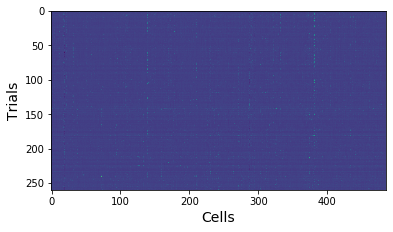

In [36]:
plt.imshow(response_array)
plt.xlabel("Cells", fontsize=14)
plt.ylabel("Trials", fontsize=14)

Before running PCA, we must zero-mean the data

In [37]:
response_array -= response_array.mean()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
## How many components do we need?
Let's start getting a lot and then see which was are most informative

In [38]:
pca = PCA(n_components=20)

In [39]:
pca.fit(response_array)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.components_.shape

(20, 486)

Text(0, 0.5, 'Explained variance ratio')

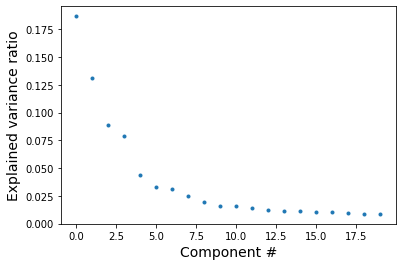

In [41]:
plt.plot(pca.explained_variance_ratio_, '.')
plt.xlabel("Component #", fontsize=14)
plt.ylabel("Explained variance ratio", fontsize=14)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Let's visualize these data projected onto the first two components

In [42]:
response_reduced = pca.fit_transform(response_array)

In [43]:
response_reduced.shape

(260, 20)

Text(0, 0.5, 'Second principal component')

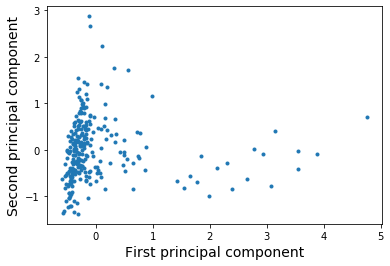

In [44]:
plt.plot(response_reduced[:,0], response_reduced[:,1], '.')
plt.xlabel("First principal component", fontsize=14)
plt.ylabel("Second principal component", fontsize=14)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
### What are the two components that explain most of the variance?

Text(0.5, 0, 'Cell #')

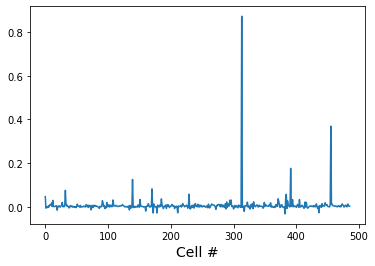

In [45]:
plt.plot(pca.components_[0])
plt.xlabel("Cell #", fontsize=14)

Text(0.5, 0, 'Cell #')

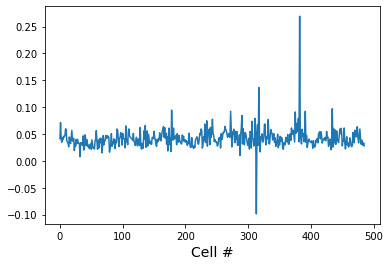

In [46]:
plt.plot(pca.components_[1])
plt.xlabel("Cell #", fontsize=14)

This suggests that there are a small number of cells that are more informative than the rest.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Plot the projected data, and label each trial according to the image that was presented.

Text(0, 0.5, 'Second principal component')

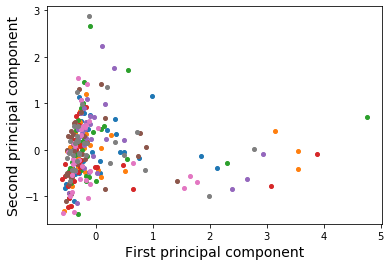

In [47]:
colors=['C0','C1','C2','C3','C4','C5','C6','C7','C8']
trial_list = tr.change_image_name.unstack().values[:,:].T[:,0]
images = np.unique(trial_list)
for count, a in enumerate(images):
    inds = trial_list == a
    plt.plot(response_reduced[inds,0],response_reduced[inds,1],'.',color=colors[count],markersize=8)
plt.xlabel("First principal component", fontsize=14)
plt.ylabel("Second principal component", fontsize=14)